# 1.関数の定義

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score

def loocv_sklearn(df: pd.DataFrame,
                  X_cols: list,
                  Y_col: str,
                  standardize: bool = True,
                  kernel=None):
    """
    scikit-learnを使ったGaussian ProcessによるLOOCV評価

    Parameters:
        df: 入力DataFrame
        X_cols: 説明変数のカラム名リスト
        Y_col: 目的変数のカラム名
        standardize: 標準化するかどうか
        kernel: sklearnのカーネル（指定がなければ RBF）

    Returns:
        R²スコア（float）と y vs ŷ の散布図を表示
    """

    X_all = df[X_cols].values
    y_all = df[[Y_col]].values  # (n, 1)

    loo = LeaveOneOut()
    y_true, y_pred = [], []

    for train_idx, test_idx in loo.split(X_all):
        X_train, X_test = X_all[train_idx], X_all[test_idx]
        y_train, y_test = y_all[train_idx], y_all[test_idx]

        # 標準化（LOO内で毎回fit → データリーク防止）
        if standardize:
            x_scaler = StandardScaler().fit(X_train)
            y_scaler = StandardScaler().fit(y_train)

            X_train = x_scaler.transform(X_train)
            X_test = x_scaler.transform(X_test)
            y_train = y_scaler.transform(y_train)
        else:
            y_scaler = None

        # カーネルの設定（デフォルト：C(1.0) * RBF(1.0)）
        kernel_used = kernel if kernel else C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0)

        model = GaussianProcessRegressor(kernel=kernel_used, alpha=1e-8, normalize_y=False)
        model.fit(X_train, y_train.ravel())

        y_pred_i = model.predict(X_test).reshape(-1, 1)
        if standardize:
            y_pred_i = y_scaler.inverse_transform(y_pred_i)

        y_true.append(y_test[0, 0])
        y_pred.append(y_pred_i[0, 0])

    r2 = r2_score(y_true, y_pred)
    print(f"LOOCV R² (sklearn): {r2:.4f}")

    plt.figure(figsize=(5, 5))
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], '--', color='gray')
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title("y vs ŷ (LOOCV - sklearn)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return r2

# 2.dfの準備

In [2]:
input = "/Users/kaker/OneDrive - YNU(ynu.jp)/大学用/lab/VScode/多目的最適化の理論構築/train/result0.xlsx"
df_all = pd.read_excel(input)

X_cols = ["F12","F13","F14","F15","F16","F20","F0","R12","R13","R14","R15","R16","R20","R0"]
Y_col_mwave1 = "mwave1"
Y_col_mstrength1 = "mstrength1"
Y_col_dwave1 = "dwave1"
Y_col_dstrength1 = "dstrength1"

# df_all.head()

# 3.LOOCVの実行

LOOCV R² (sklearn): 0.9927


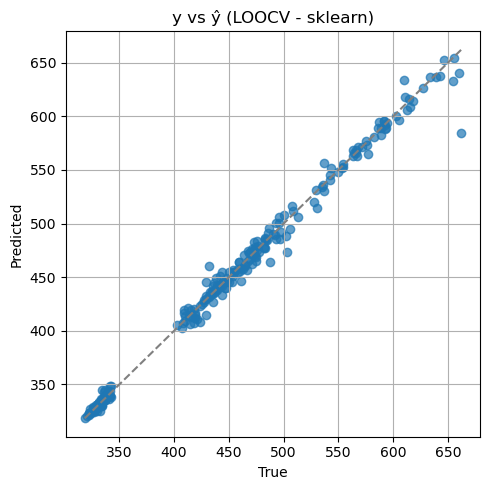

Result for mwave1: 0.9927


c:\Users\kaker\anaconda3\envs\BO_test\lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
c:\Users\kaker\anaconda3\envs\BO_test\lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
c:\Users\kaker\anaconda3\envs\BO_test\lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

LOOCV R² (sklearn): 0.9319


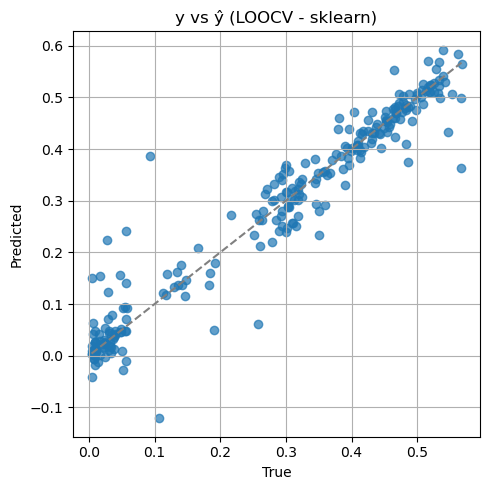

Result for mstrength1: 0.9319
LOOCV R² (sklearn): 0.4955


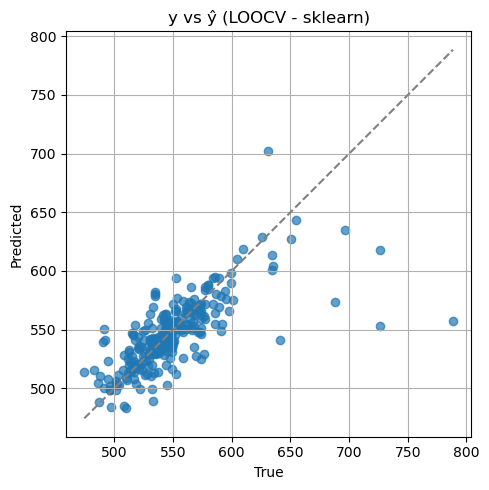

Result for dwave1: 0.4955
LOOCV R² (sklearn): -0.0079


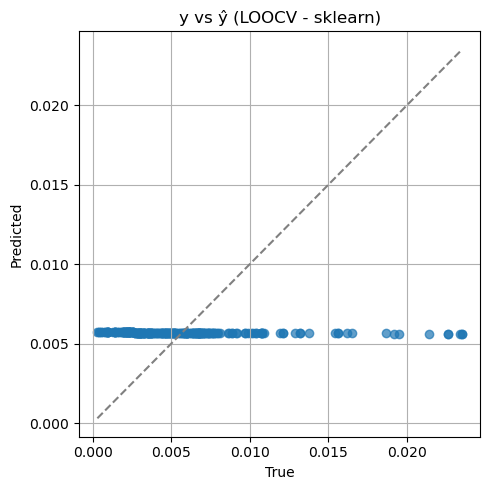

Result for dstrength1: -0.0079


In [3]:
result_mwave1 = loocv_sklearn(df_all, X_cols, Y_col_mwave1)
print(f"Result for {Y_col_mwave1}: {result_mwave1:.4f}")

result_mstrength1 = loocv_sklearn(df_all, X_cols, Y_col_mstrength1)
print(f"Result for {Y_col_mstrength1}: {result_mstrength1:.4f}")

result_dwave1 = loocv_sklearn(df_all, X_cols, Y_col_dwave1)
print(f"Result for {Y_col_dwave1}: {result_dwave1:.4f}")

result_dstrength1 = loocv_sklearn(df_all, X_cols, Y_col_dstrength1)
print(f"Result for {Y_col_dstrength1}: {result_dstrength1:.4f}")